In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Dataset: Elon_Musk.csv

In [3]:
# Loading dataset

tweets = pd.read_csv('Elon_musk.csv', encoding = 'latin1', error_bad_lines=False)
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Data Preprocessing for Sentiment Analysis


In [4]:
tweets.shape


(1999, 2)

In [5]:
tweets.head()


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
# Dropping additional index column 'Unnamed'

tweets = tweets.drop('Unnamed: 0', axis = 1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [7]:
# removing both the leading and the trailing characters such as spaces in tweets
tweets = [x.strip() for x in tweets.Text]

In [8]:
# removes empty strings, because they are considered in Python as False
tweets = [x for x in tweets if x]

In [9]:
tweets[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [10]:
import nltk


In [11]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences


['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [13]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


# Dataset: afinn.csv

In [14]:
afinn= pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [15]:
afinn.shape

(2477, 2)

In [16]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [17]:
afinn.describe()

,value
count,2477.000000
mean,-0.589423
std,2.123931
min,-5.000000
25%,-2.000000
50%,-2.000000
75%,2.000000
max,5.000000


In [18]:
afinn.isnull().sum()

word     0
value    0
dtype: int64

In [19]:
afinn.duplicated().any()

False

In [20]:
affinity_scores = afinn.set_index(['word'])['value'].to_dict()


In [21]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [22]:
# test that it works
calculate_sentiment(text = 'good')

3

In [23]:
sent_df['sentiment_neg'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_neg
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [24]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [25]:
sent_df.sort_values(by='sentiment_neg')


,sentence,sentiment_neg,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [26]:
# Maximum sentiment value
sent_df['sentiment_neg'].max()

17

In [27]:
# tweet which is having max sentiment value
sent_df[sent_df['sentiment_neg']==16]

,sentence,sentiment_neg,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [28]:
# Full tweet at index 105
sent_df['sentence'][105]

'@Erdayastronaut @SpaceX Was also thinking that SpaceX Boca should hold fun parties and give tours for the community from time to time @Erdayastronaut @SpaceX I super support public spaces around our production &amp; launch sites, wherever it can be done\x85 https://t.co/wmqWcT2WFH @Christo49699922 @sean18743005 @Erdayastronaut @SpaceX That too @sean18743005 @Erdayastronaut @SpaceX Catapult high into the air &amp; land on the roof with a base jumping parachute (the only way to travel) @Erdayastronaut @SpaceX That\x92s actually our restaurant, but SpaceX is building a futuristic bar at the top of the h\x85 https://t.co/z2UmtGSAoI @techreview And increase fun!'

In [29]:
# minimum sentiment value
sent_df['sentiment_neg'].min()

-8

In [30]:
# tweet which is having min sentiment value
sent_df[sent_df['sentiment_neg']==-8]

,sentence,sentiment_neg,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61


In [31]:
# Full tweet at index 647
sent_df['sentence'][647]

'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.'

In [32]:
# Sentiment score of the whole review
sent_df['sentiment_neg'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_neg, dtype: float64

In [33]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_neg']<=0]

,sentence,sentiment_neg,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [34]:
sent_df[sent_df['sentiment_neg']>=10]


,sentence,sentiment_neg,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",10,45
159,@harsimranbansal @heydave7 It will most likely...,11,93
183,Theres some great AI out ther https://t.co/v...,10,48
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
224,"@PPathole @karpathy For a second there, I thou...",11,69
490,Gives a false sense of https://t.co/aIGaEnC8f...,10,41
530,@TeslaClubIN @WholeMarsBlog @MKBHD Next year f...,10,121


In [35]:
sent_df['index']=range(0,len(sent_df))


<AxesSubplot:xlabel='sentiment_neg', ylabel='Density'>

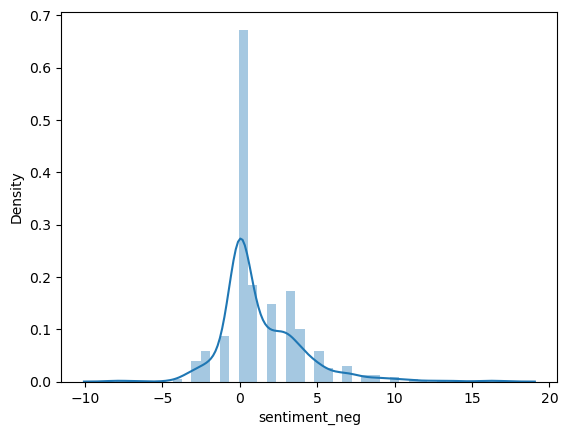

In [36]:
import seaborn as sns
sns.distplot(sent_df['sentiment_neg'])

<AxesSubplot:xlabel='index', ylabel='sentiment_neg'>

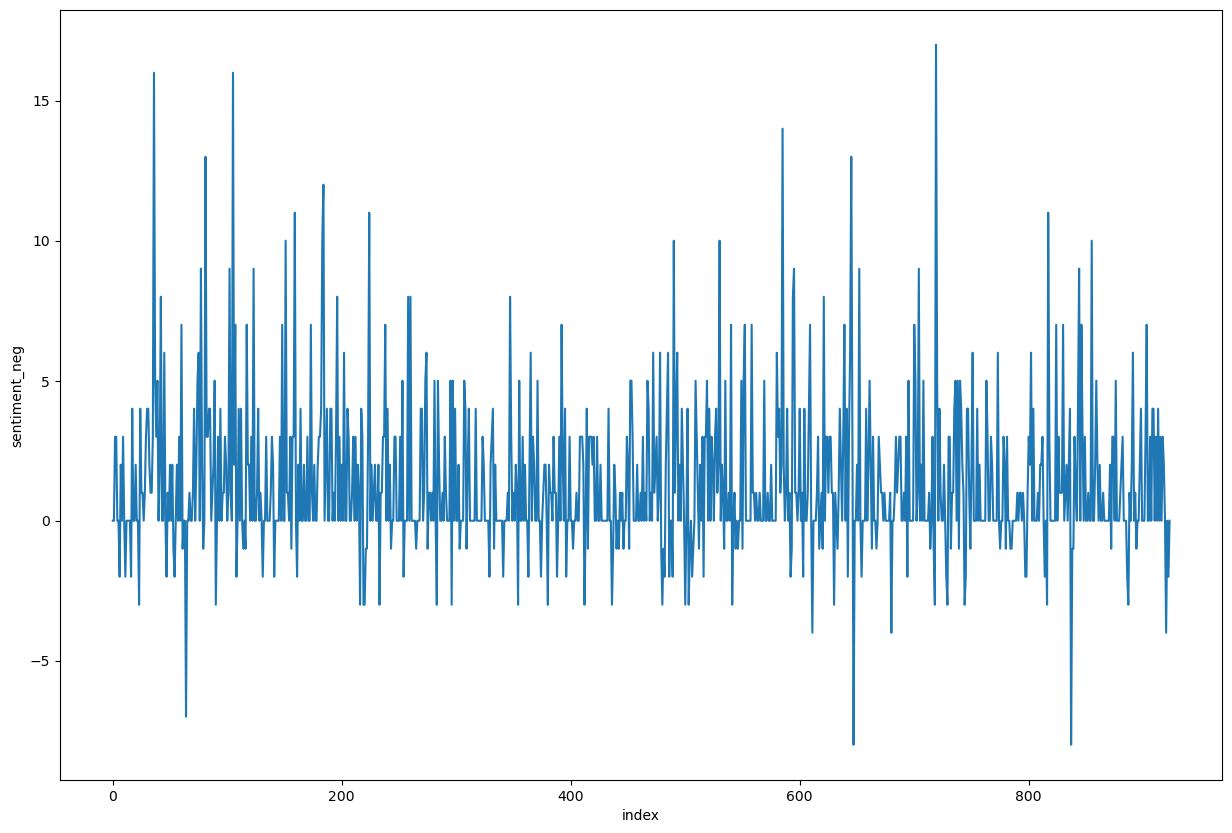

In [37]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_neg',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_neg'>

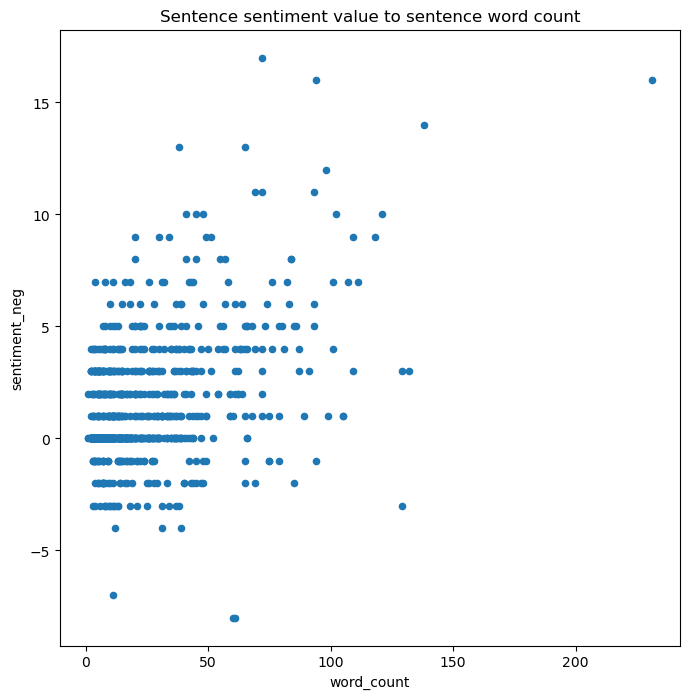

In [38]:
sent_df.plot.scatter(x='word_count', y='sentiment_neg', figsize=(8,8), title='Sentence sentiment value to sentence word count')


In [39]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_neg'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)


In [40]:
sent_df.sample(10)

,sentence,sentiment_neg,word_count,index,Sentiment_Class
281,"Frankly, this was one https://t.co/hj0ThLR48N...",5,55,281,Positive
604,@flcnhvy @sama True @HistoryInPics The LEGO Mo...,4,14,604,Positive
83,@TheOnion Guess you been watching Cobra Kai @S...,3,41,83,Positive
684,Grateful for my @Tesla #Powerwall and 162 hour...,3,12,684,Positive
374,The Model 3 ramp was extreme stress &amp; pa ...,-2,26,374,Negative
782,@Astro_Doug &amp; @AstroBehnken will spend one...,0,17,782,Neutral
51,The interior design is<U+0001F44C>.,0,4,51,Neutral
731,https://t.co/p2Ic1crPef @Nikola_Truth Haha tru...,3,17,731,Positive
867,Already does that in alpha build.,0,6,867,Neutral
620,Rockets are hard.,-1,3,620,Negative


<AxesSubplot:xlabel='Sentiment_Class', ylabel='count'>

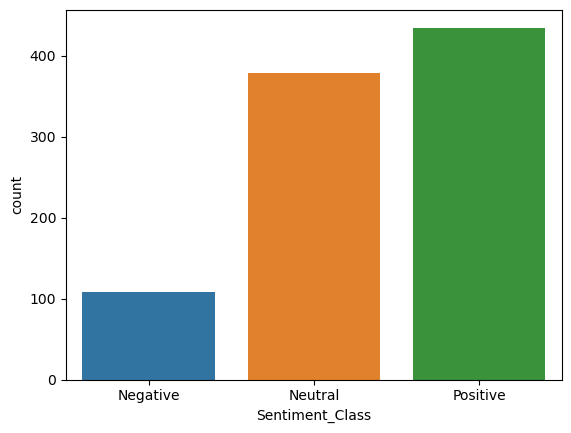

In [41]:
sns.countplot(x = 'Sentiment_Class', data = sent_df)


In [42]:
sent_df['Sentiment_Class'].value_counts()


Positive    435
Neutral     379
Negative    108
Name: Sentiment_Class, dtype: int64